# DOMAIN: Smartphone, Electronics

## CONTEXT: 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

## DATA DESCRIPTION:

    • author : name of the person who gave the rating
    • country : country the person who gave the rating belongs to
    • data : date of the rating
    • domain: website from which the rating was taken from
    • extract: rating content
    • language: language in which the rating was given
    • product: name of the product/mobile phone for which the rating was given
    • score: average rating for the phone
    • score_max: highest rating given for the phone
    • source: source from where the rating was taken

## PROJECT OBJECTIVE: 
We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.

### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Importing Data files
data1 = pd.read_csv('phone_user_review_file_1.csv', encoding='latin-1')
data2 = pd.read_csv('phone_user_review_file_2.csv', encoding='latin-1')
data3 = pd.read_csv('phone_user_review_file_3.csv', encoding='latin-1')
data4 = pd.read_csv('phone_user_review_file_4.csv', encoding='latin-1')
data5 = pd.read_csv('phone_user_review_file_5.csv', encoding='latin-1')
data6 = pd.read_csv('phone_user_review_file_5.csv', encoding='latin-1')

In [2]:
# Merge all datasets
phone_Data=pd.concat([data1,data2,data3,data4,data5,data6],axis=0,sort=False)

In [3]:
# make a copy of the original dataframe to 
phone_DataOG = phone_Data.copy()

In [4]:
phone_Data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [5]:
# Check Size & Shape of data
print(phone_Data.shape,phone_Data.size)

(1601512, 11) 17616632


In [6]:
print(phone_Data.columns)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')


In [7]:
#Check Data types
phone_Data.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

Only score & score_max clolumn have float data

In [8]:
# Check no fo unique users
users = phone_Data['author'].unique()
len(users)

705369

In [9]:
# Check no of unique products
products = phone_Data['product'].unique()
len(products)

52240

In [10]:
#Round off scores to the nearest integers.
phone_Data.score=phone_Data.score.round()

In [11]:
# Check for missing values
phone_Data.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        80050
score_max    80050
extract      24853
author       79010
product          1
dtype: int64

In [12]:
#drop null values
phone_Data.dropna(inplace=True)

# Check for missing values
phone_Data.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [13]:
# Check Size & Shape of data
print(phone_Data.shape,phone_Data.size)

(1427167, 11) 15698837


In [14]:
# Check duplicate values
phone_Data.duplicated().sum()

292674

In [15]:
# Drop duplicate values
phone_Data.drop_duplicates(inplace=True)

# Check duplicate values
phone_Data.duplicated().sum()

0

In [16]:
# Check Size & Shape of data
print(phone_Data.shape,phone_Data.size)

(1134493, 11) 12479423


In [17]:
# Sample only 1000000 data points from the huge dataset
phone_Data1 = phone_Data.sample(n=1000000,random_state=612)

In [18]:
#Drop irrelevant features
phone_Data1.drop(['phone_url', 'date','lang','country','domain','score_max','extract','source'], axis = 1,inplace=True)

In [19]:
phone_Data1.head()

,score,author,product
3615,10.0,inffomaster1976@gmail.com,"Smartphone Nokia Lumia 630 Dual, 3G TV Digital..."
43477,9.0,PriscillaFleur,Sony Xperia Z3 Compact oranje / 16 GB - Overzicht
34348,9.0,jos,Samsung Galaxy S7 zwart / 32 GB
93259,10.0,Amazon Customer,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U..."
205718,10.0,Amazon Customer,"LG Electronics Nexus 5X Unlocked Smart Phone, ..."


In [20]:
print(phone_Data1.shape,phone_Data1.size)

(1000000, 3) 3000000


C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


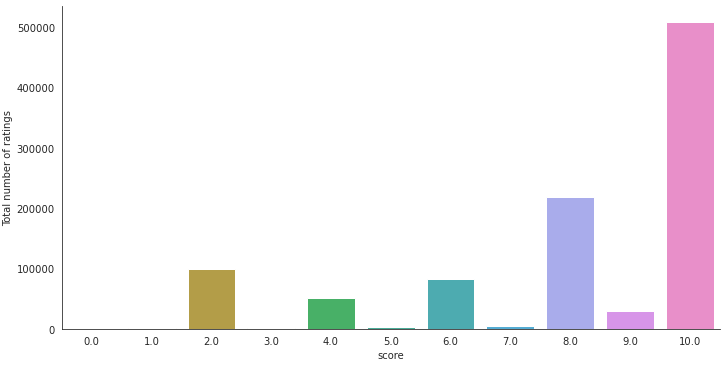

In [21]:
# Check the distribution of scores 
with sns.axes_style('white'):
    g = sns.factorplot("score", data=phone_Data1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

### 2. Answer the following questions

#### • Identify the most rated features

In [22]:
# Most rated users
phone_Data1.groupby('author')['score'].mean().sort_values(ascending=False)

author
!!!!!!!!!!!!!!!!!!!!!!!!!!!!    10.0
Forer Renate                    10.0
Kiley                           10.0
aldÃ­sia                        10.0
O. Schelhaas                    10.0
                                ... 
tawaris4                         0.0
yodoff                           0.0
Ð²Ð¾Ñ                           0.0
resler                           0.0
Ð¤Ð¸Ð»Ð»                         0.0
Name: score, Length: 608588, dtype: float64

In [23]:
# Most rated products
phone_Data1.groupby('product')['score'].mean().sort_values(ascending=False)

product
ÙØ§ÙØ§ÙÙ P9 Ø¨ÙÙØ³ - 64 Ø¬ÙØ¬Ø§Ø¨Ø§ÙØªØ ÙÙØ± Ø¬Ù Ø§Ù ØªÙ Ø§ÙØ ÙØ§Ù ÙØ§ÙØ Ø°ÙØ¨Ù                                  10.0
Nokia Lumia 920 Vodafone-Edition ohne Vertrag weiÃ                                                                                     10.0
Nokia Lumia 930 - Smartphone libre Windows Phone (pantalla 5", cÃ¡mara 20 Mp, 32 GB, Quad-Core 2.2 GHz, 2 GB RAM), verde (importado)    10.0
Nokia Lumia 930 - Black                                                                                                                 10.0
Nokia Lumia 928 32GB Verizon + Unlocked GSM 4G LTE Windows Smartphone - Black                                                           10.0
                                                                                                                                        ... 
Kyocera Hydro Elite (Verizon)                                                                                                            1.0
Kyoce

#### • Identify the users with most number of reviews

In [24]:
# User with Most number of reviews
phone_Data1.groupby('author')['score'].count().sort_values(ascending=False)

author
Amazon Customer                 66868
Cliente Amazon                  16898
e-bit                            7389
Client d'Amazon                  6766
Amazon Kunde                     4060
                                ...  
WICASH                              1
WICHIANDIA                          1
WICHO955                            1
WICHT76                             1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!        1
Name: score, Length: 608588, dtype: int64

In [25]:
# products with Most number of reviews
phone_Data1.groupby('product')['score'].count().sort_values(ascending=False)

product
Lenovo Vibe K4 Note (White,16GB)                                                                                                                                              4596
Lenovo Vibe K4 Note (Black, 16GB)                                                                                                                                             3885
OnePlus 3 (Graphite, 64 GB)                                                                                                                                                   3596
OnePlus 3 (Soft Gold, 64 GB)                                                                                                                                                  3124
Huawei P8lite zwart / 16 GB                                                                                                                                                   2367
                                                                                                 

#### Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset

In [26]:
# Count the number of occurance of product
usersPerProduct = phone_Data1['product'].value_counts()
usersPerProduct.head()

Lenovo Vibe K4 Note (White,16GB)     4596
Lenovo Vibe K4 Note (Black, 16GB)    3885
OnePlus 3 (Graphite, 64 GB)          3596
OnePlus 3 (Soft Gold, 64 GB)         3124
Huawei P8lite zwart / 16 GB          2367
Name: product, dtype: int64

In [27]:
usersPerProduct.shape

(45928,)

In [28]:
# Count the number of occurance of users
productPerUser = phone_Data1['author'].value_counts()
productPerUser.head()

Amazon Customer    66868
Cliente Amazon     16898
e-bit               7389
Client d'Amazon     6766
Amazon Kunde        4060
Name: author, dtype: int64

In [29]:
productPerUser.shape

(608588,)

In [30]:
# Select the data with products having more than 50 ratings
phone_Data1 = phone_Data1[phone_Data1["product"].isin(usersPerProduct[usersPerProduct>50].index)]

In [31]:
#Select the data with products having more than 50 ratings and users who have given more than 50 ratings
phone_Data1 = phone_Data1[phone_Data1["author"].isin(productPerUser[productPerUser>50].index)]

In [32]:
phone_Data1.head()

,score,author,product
93259,10.0,Amazon Customer,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U..."
21362,6.0,Amazon Customer,"Lenovo Vibe K5 (Grey, VoLTE update)"
53900,2.0,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"
11426,10.0,Amazon Customer,Samsung GALAXY S7 EDGE G935FD DUAL SIM INTERNA...
54259,8.0,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"


In [33]:
print(phone_Data1.shape,phone_Data1.size)

(129810, 3) 389430


### 3. Build a popularity based model and recommend top 5 mobile phones.

In [34]:
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(phone_Data1, test_size = 0.3, random_state=0)
train_data.head()

,score,author,product
171796,2.0,e-bit,Smartphone Samsung Galaxy S4 Mini GT-I9192
85543,4.0,Amazon Customer,Microsoft Lumia 650 UK SIM-Free Smartphone - W...
338067,10.0,Chris,Sony Ericsson C902 Swift Black (UMTS 5MP Cyber...
18508,8.0,Amazon Customer,"Lenovo Vibe K5 (Gold, VoLTE update)"
163921,8.0,Client d'Amazon,Samsung Galaxy A3 2016 Smartphone dÃ©bloquÃ© 4...


In [35]:
#print the size & shape of the data
print(train_data.shape,test_data.shape)

(90867, 3) (38943, 3)


In [36]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('product').agg({'author': 'count'}).reset_index()
train_data_grouped.rename(columns = {'author': 'score'},inplace=True)
train_data_grouped.head()

,product,score
0,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5...,2
1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,5
2,"AICEK Coque ASUS ZenFone 2 ZE550ML/ZE551ML, AI...",19
3,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK ...",16
4,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui...",21


In [37]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'product'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,product,score,Rank
1743,"Lenovo Vibe K4 Note (White,16GB)",1928,1.0
1742,"Lenovo Vibe K4 Note (Black, 16GB)",1566,2.0
2514,"OnePlus 3 (Graphite, 64 GB)",1150,3.0
2515,"OnePlus 3 (Soft Gold, 64 GB)",1102,4.0
1744,"Lenovo Vibe K5 (Gold, VoLTE update)",961,5.0


In [38]:
# Use popularity based recommender model to make predictions
def recommend(author):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['author'] = author 
      
    #Bring author column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [39]:
find_recom = [15,121,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

      author                              product  score  Rank
1743      15     Lenovo Vibe K4 Note (White,16GB)   1928   1.0
1742      15    Lenovo Vibe K4 Note (Black, 16GB)   1566   2.0
2514      15          OnePlus 3 (Graphite, 64 GB)   1150   3.0
2515      15         OnePlus 3 (Soft Gold, 64 GB)   1102   4.0
1744      15  Lenovo Vibe K5 (Gold, VoLTE update)    961   5.0


Here is the recommendation for the userId: 121

      author                              product  score  Rank
1743     121     Lenovo Vibe K4 Note (White,16GB)   1928   1.0
1742     121    Lenovo Vibe K4 Note (Black, 16GB)   1566   2.0
2514     121          OnePlus 3 (Graphite, 64 GB)   1150   3.0
2515     121         OnePlus 3 (Soft Gold, 64 GB)   1102   4.0
1744     121  Lenovo Vibe K5 (Gold, VoLTE update)    961   5.0


Here is the recommendation for the userId: 53

      author                              product  score  Rank
1743      53     Lenovo Vibe K4 Not

<ipython-input-38-19ced13b59b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['author'] = author
<ipython-input-38-19ced13b59b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['author'] = author
<ipython-input-38-19ced13b59b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. It is not personalized to particular user

### 4. Build a collaborative filtering model using SVD. 
You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [40]:
from surprise import Dataset,Reader
from surprise import SVD, KNNWithMeans
from surprise import accuracy

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(phone_Data1[['author', 'product', 'score']], reader)

In [41]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

# to build on full data
#trainset = data.build_full_trainset()

In [42]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x000001F94AB572E0>

In [43]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

### 5. Evaluate the collaborative model. Print RMSE value.

In [44]:
test_predSVD = svd_model.test(testset)

In [45]:
# compute RMSE
accuracy.rmse(test_predSVD)

RMSE: 2.7884


2.788416584192061

### KNNWithMeans Item-Item based

In [46]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [47]:
test_predKNN1=algo_i.test(testset)
print(accuracy.rmse(test_predKNN1))

RMSE: 2.8444
2.8443825400181733


### KNNWithMeans user based

In [48]:
algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': True})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [49]:
test_predKNN2=algo_i.test(testset)
print(accuracy.rmse(test_predKNN2))

RMSE: 2.8394
2.8394044101313307


In [50]:
uid = str(11676)  # raw user id (as in the ratings file). They are **strings**!
iid = "074323748X"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: 11676      item: 074323748X r_ui = 0.00   est = 7.81   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


### 6. Predict score (average rating) for test users.

In [51]:
pred = pd.DataFrame(test_predSVD)
pred.groupby('uid')['r_ui'].mean().sort_values(ascending=False)

uid
federico         10.000000
Jeremy           10.000000
narn3049         10.000000
gabberino93      10.000000
Roland           10.000000
                   ...    
Heather           5.142857
Laurent           4.500000
Julio             3.500000
Gast              2.500000
Puneet Sharma     2.000000
Name: r_ui, Length: 663, dtype: float64

### 7. Report your findings and inferences.

This dataset have score range from 1 to 10.

Original datset have 678737 unique users & 47259 unique products

dataset have high count for 10 score

As per above RMSE Score, SVD model provides the less RMSE score than other models. So it's one of the best model.
We can also use some tunning techniques to improve the accuracy.

### 8. Try and recommend top 5 products for test users.

In [52]:
# recommend top 5 products for test users
pred[pred['uid'] == 'Amazon Customer'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
16265,Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlo...,10.0,8.532350
22523,ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core...,10.0,7.235500
22504,"Motorola Moto G 3rd Generation (Black, 16GB)",10.0,8.855627
22509,"Mi 4i (White, 16GB)",10.0,6.714270
10536,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,10.0,6.789090


### 9. Try cross validation techniques to get better results.

In [53]:
from surprise.model_selection import cross_validate

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(),KNNWithMeans()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,2.742677,1.055716,4.372166
SVD,2.748976,5.036139,0.173495


### 10. In what business scenario you should use popularity based Recommendation Systems ?

When we don't have any user data, then we can use popularity based recommendation system. Popularity based Recommendation System works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that

### 11. In what business scenario you should use CF based Recommendation Systems ?

Collaborative Filtering is the most common technique used when it comes to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected.

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

### 12. What other possible methods can you think of which can further improve the recommendation for different users ?

We can use some other Recommendation techniques as below with different cross validation techniques.

    1) Content-based recommender system 
    2) Demographic based recommender system 
    3) Utility based recommender system 
    4) Knowledge based recommender system 
    5) Hybrid recommender system

# Thanks !!!